In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("ggplot2")
library(ggplot2)
install.packages("randomForest")
library(randomForest)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Instalar y cargar las bibliotecas necesarias
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Autenticarse con Google Drive
drive_auth()

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8e078831cc3d9c82762e18515837d9ad&access_type=offline&prompt=consent



In [ ]:
# Especificar el ID del archivo y la ruta de destino
file_id <- "https://drive.google.com/file/d/1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz/view?usp=drivesdk"  # Reemplaza este ID con el ID de tu archivo
drive_download(as_id(file_id), path = "archivo.csv", overwrite = TRUE)

In [ ]:
# Leer el archivo CSV desde la URL
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv("archivo.csv", show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [ ]:
summary(df)

In [ ]:
head(df,5)

**LIMPIEZA DE DATOS**

In [ ]:
# Calcular la tabla de frecuencias de cause_desc
freq_cause_desc <- table(df$cause_desc)

# Ordenar las frecuencias de menor a mayor
freq_sorted_cause <- sort(freq_cause_desc)

# Calcular la frecuencia relativa acumulada
freq_relative_cause <- cumsum(freq_sorted_cause) / sum(freq_sorted_cause)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_cause <- names(freq_sorted_cause[freq_relative_cause < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$cause_desc[df$cause_desc %in% categorias_baja_frecuencia_cause] <- "Misadjusted machine head looper / Enlazador de cabezal desajustado"

In [ ]:
# Calcular la tabla de frecuencias de action_desc
freq_action_desc <- table(df$action_desc)

# Ordenar las frecuencias de menor a mayor
freq_sorted_action <- sort(freq_action_desc)

# Calcular la frecuencia relativa acumulada
freq_relative_action <- cumsum(freq_sorted_action) / sum(freq_sorted_action)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_action <- names(freq_sorted_action[freq_relative_action < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$action_desc[df$action_desc %in% categorias_baja_frecuencia_action] <- "Adjust machine head looper / Ajustar enlazador de cabezal"

In [ ]:
# Calcular la tabla de frecuencias de operation
freq_operation <- table(df$operation)

# Ordenar las frecuencias de menor a mayor
freq_sorted_operation <- sort(freq_operation)

# Calcular la frecuencia relativa acumulada
freq_relative_operation <- cumsum(freq_sorted_operation) / sum(freq_sorted_operation)

# Definir umbral de frecuencia acumulada
umbral <- 0.1

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_operation <- names(freq_sorted_operation[freq_relative_operation < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$operation[df$operation %in% categorias_baja_frecuencia_operation] <- "HEM SLEEVE"

In [ ]:
# Calcular la tabla de frecuencias de base_model
freq_model <- table(df$base_model)

# Ordenar las frecuencias de menor a mayor
freq_sorted_model <- sort(freq_model)

# Calcular la frecuencia relativa acumulada
freq_relative_model <- cumsum(freq_sorted_model) / sum(freq_sorted_model)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_model <- names(freq_sorted_model[freq_relative_model < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$base_model[df$base_model %in% categorias_baja_frecuencia_model] <- "VC1700"

In [ ]:
write_csv(df, "maquinaria1.csv")

In [ ]:
sapply(df, function(x) sum(is.na(x)))
#Fiabilidad suficiente para continuar con el trabajo

In [9]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

In [10]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [11]:
mean(df$downtime_gross < 0)

[1] 2.683375e-05

In [12]:
# Filtrar registros donde downtimeGross no sea negativo
df <- df %>%
  filter(downtime_gross >= 0)

In [13]:
mean(df$repair_hours < 0)

[1] 0

In [14]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours, -repair_hours)
#Se han eliminado codigos y variables calculadas

In [15]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")
#Colocar comentario de por qué el filtro, colocar que tecnicas pueden aplicarse y cuales no, colocar en apartado diferente

In [16]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [17]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

In [18]:
df <- df %>%
  mutate(mechanic = ifelse(mechanic == "GALEAS PEREZ EDWIN ROGELIO", "Edwin Rogelio Galeas Perez", mechanic))

In [22]:
# Calcular la tabla de frecuencias de mechanic
freq_mechanic <- table(df$mechanic)

# Ordenar las frecuencias de menor a mayor
freq_sorted_mechanic <- sort(freq_mechanic)

# Calcular la frecuencia relativa acumulada
freq_relative_mechanic <- cumsum(freq_sorted_mechanic) / sum(freq_sorted_mechanic)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_mechanic <- names(freq_sorted_mechanic[freq_relative_mechanic < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$mechanic[df$mechanic %in% categorias_baja_frecuencia_mechanic] <- "Otros"

In [24]:
# Calcular la tabla de frecuencias de problem_desc
freq_problem <- table(df$problem_desc)

# Ordenar las frecuencias de menor a mayor
freq_sorted_problem <- sort(freq_problem)

# Calcular la frecuencia relativa acumulada
freq_relative_problem <- cumsum(freq_sorted_problem) / sum(freq_sorted_problem)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_problem <- names(freq_sorted_problem[freq_relative_problem < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$problem_desc[df$problem_desc %in% categorias_baja_frecuencia_problem] <- "Otros"

In [25]:
# Calcular la tabla de frecuencias de failure_desc
freq_failure <- table(df$failure_desc)

# Ordenar las frecuencias de menor a mayor
freq_sorted_failure <- sort(freq_failure)

# Calcular la frecuencia relativa acumulada
freq_relative_failure <- cumsum(freq_sorted_failure) / sum(freq_sorted_failure)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_failure <- names(freq_sorted_failure[freq_relative_failure < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$failure_desc[df$failure_desc %in% categorias_baja_frecuencia_failure] <- "Otros"

In [26]:
#Convertir horas a minutos
df$downtime_gross <-df$downtime_gross*60

**ANALISIS DE VARIABLES**

In [27]:
dim(df)

[1] 135858     14

**Variable "Operación"**

In [28]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
operation_freq <- operation_freq %>%
  mutate(relative_freq = count / sum(count))

operation_freq

operation,count,relative_freq
<chr>,<int>,<dbl>
HEM SLEEVE,38311,0.281992963
HEM BOTTOM,15840,0.116592324
JOIN PANEL,7799,0.057405526
SET SLEEVE,7743,0.056993331
TAPE SHOULDER,7556,0.055616894
HEM AROUND,5256,0.038687453
FLAT SEAM,4987,0.036707445
JOIN SHOULDER,4857,0.035750563
ATTACH ELASTIC,4704,0.034624387


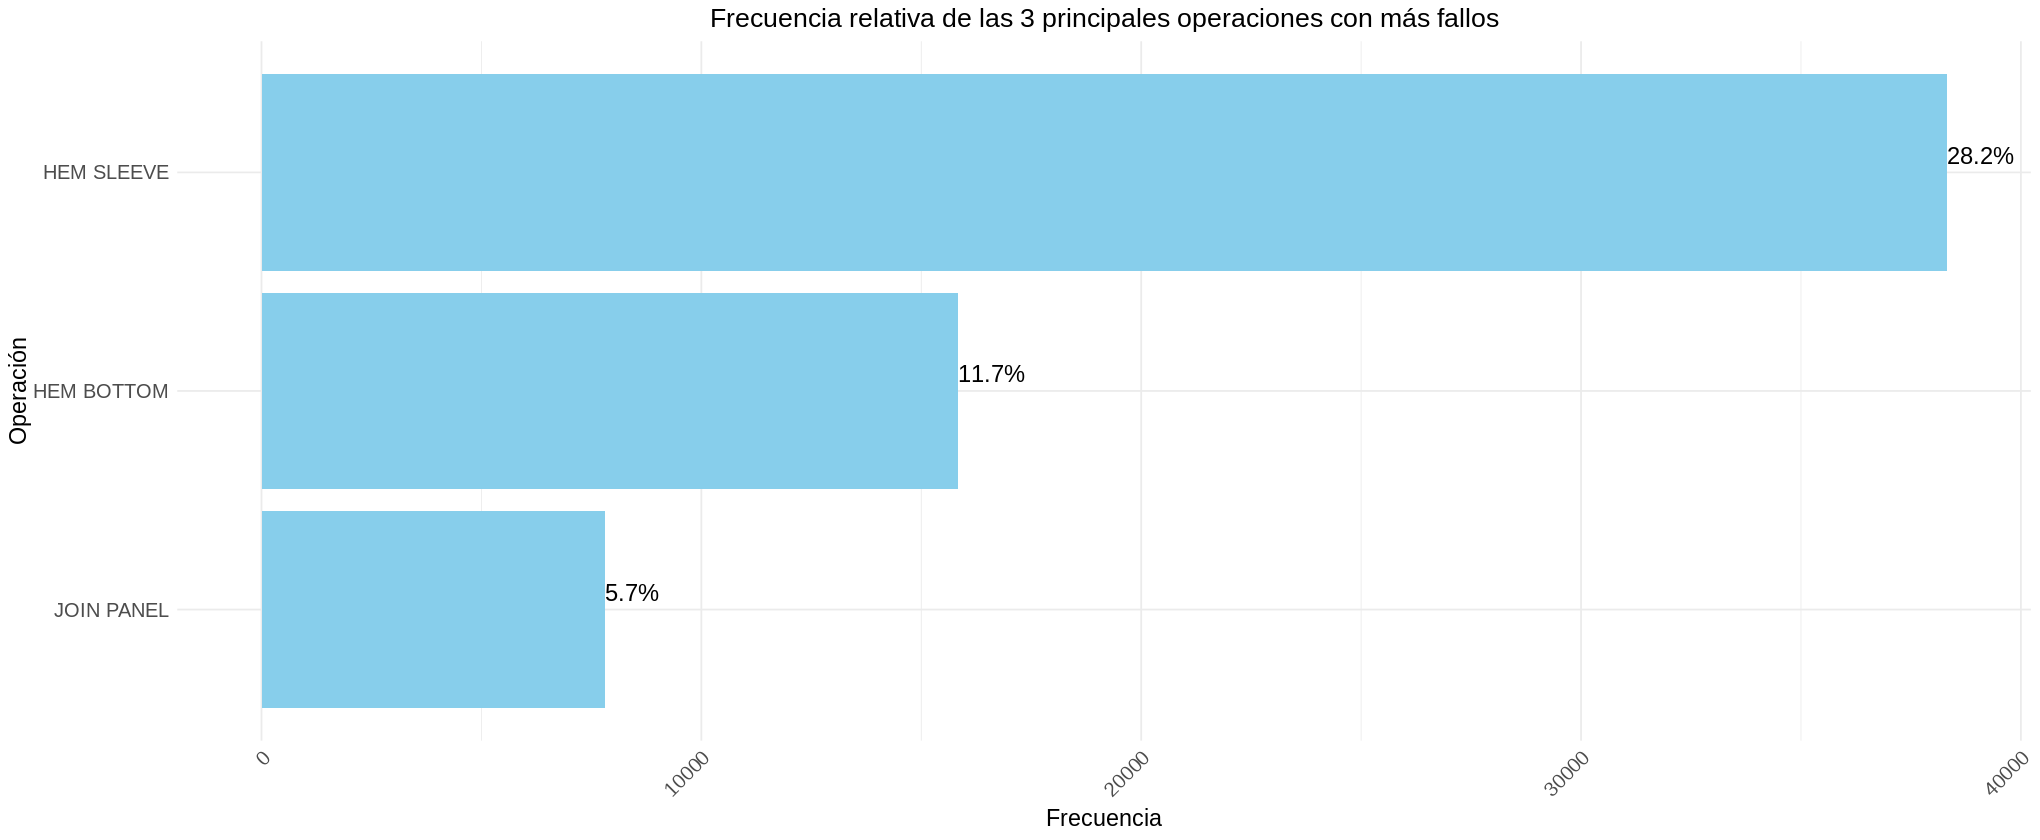

In [29]:
# Ordenar los datos por frecuencia descendente
operation_freq <- operation_freq %>%
  arrange(desc(count))

# Filtrar para obtener solo el top 3
top3_operation_freq <- operation_freq %>%
  slice_head(n = 3)

options(repr.plot.width=17, repr.plot.height=7)

ggplot(top3_operation_freq, aes(y = reorder(operation, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0, size = 5) +
  labs(title = "Frecuencia relativa de las 3 principales operaciones con más fallos",
       y = "Operación",
       x = "Frecuencia") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Cambia el tamaño del texto del eje x
    axis.text.y = element_text(size = 12),                         # Cambia el tamaño del texto del eje y
    axis.title.x = element_text(size = 14),                        # Cambia el tamaño del título del eje x
    axis.title.y = element_text(size = 14),                        # Cambia el tamaño del título del eje y
    plot.title = element_text(size = 16, hjust = 0.5)              # Cambia el tamaño del título del gráfico y lo centra
  )

**Variable "problem_desc"**

In [30]:
# Calcular la frecuencia de problemas de maquinaria
problem_freq <- df %>%
  group_by(problem_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
problem_freq <- problem_freq %>%
  mutate(relative_freq = count / sum(count))

problem_freq

problem_desc,count,relative_freq
<chr>,<int>,<dbl>
It sews with defect / Cose con defecto,95025,0.69944354
It does not sew / No cose,31928,0.23501008
Otros,8905,0.06554638


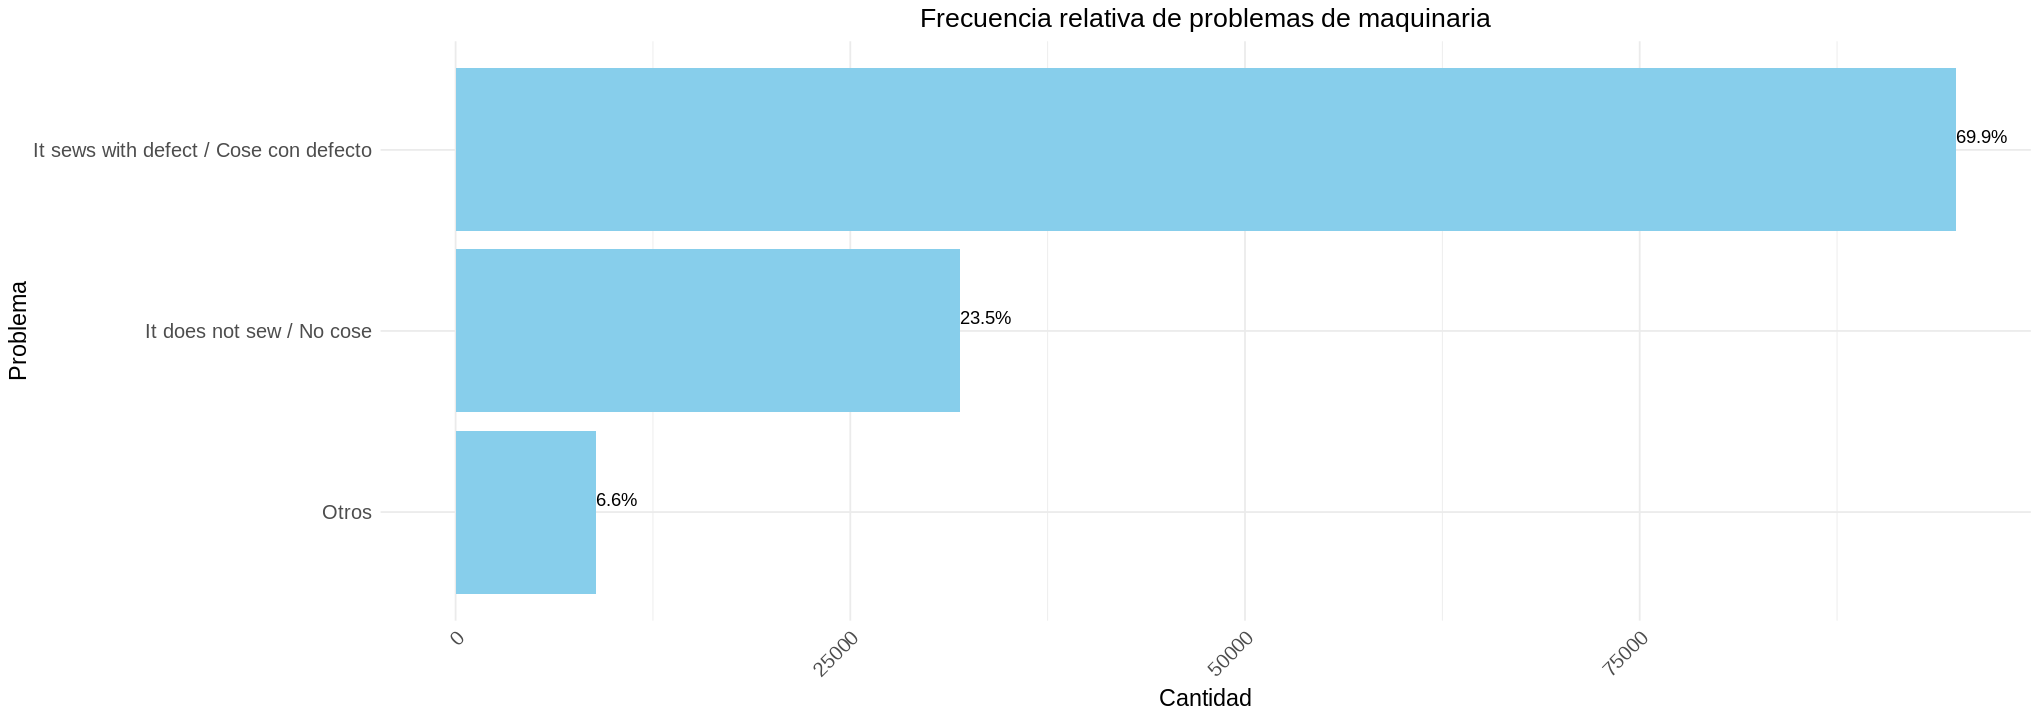

In [31]:
# Ordenar los datos por frecuencia descendente
problem_freq <- problem_freq %>%
  arrange(desc(count))

options(repr.plot.width=17, repr.plot.height=6)

ggplot(problem_freq, aes(y = reorder(problem_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0) +
  labs(title = "Frecuencia relativa de problemas de maquinaria",
       y = "Problema",
       x = "Cantidad") +
  theme_minimal() +
   theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Cambia el tamaño del texto del eje x
    axis.text.y = element_text(size = 12),                         # Cambia el tamaño del texto del eje y
    axis.title.x = element_text(size = 14),                        # Cambia el tamaño del título del eje x
    axis.title.y = element_text(size = 14),                        # Cambia el tamaño del título del eje y
    plot.title = element_text(size = 16, hjust = 0.5)              # Cambia el tamaño del título del gráfico y lo centra
  )

**Variable "failure_desc"**

In [32]:
# Calcular la frecuencia de fallos de maquinaria
failure_freq <- df %>%
  group_by(failure_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
failure_freq <- failure_freq %>%
  mutate(relative_freq = count / sum(count))

failure_freq

failure_desc,count,relative_freq
<chr>,<int>,<dbl>
Machine head failure stopping sewing / Falla cabezal dejando de coser,64019,0.4712200
Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,36833,0.2711140
Otros,21302,0.1567961
Trim off device failure / Falla dispositivo corta desperdicio,13704,0.1008700


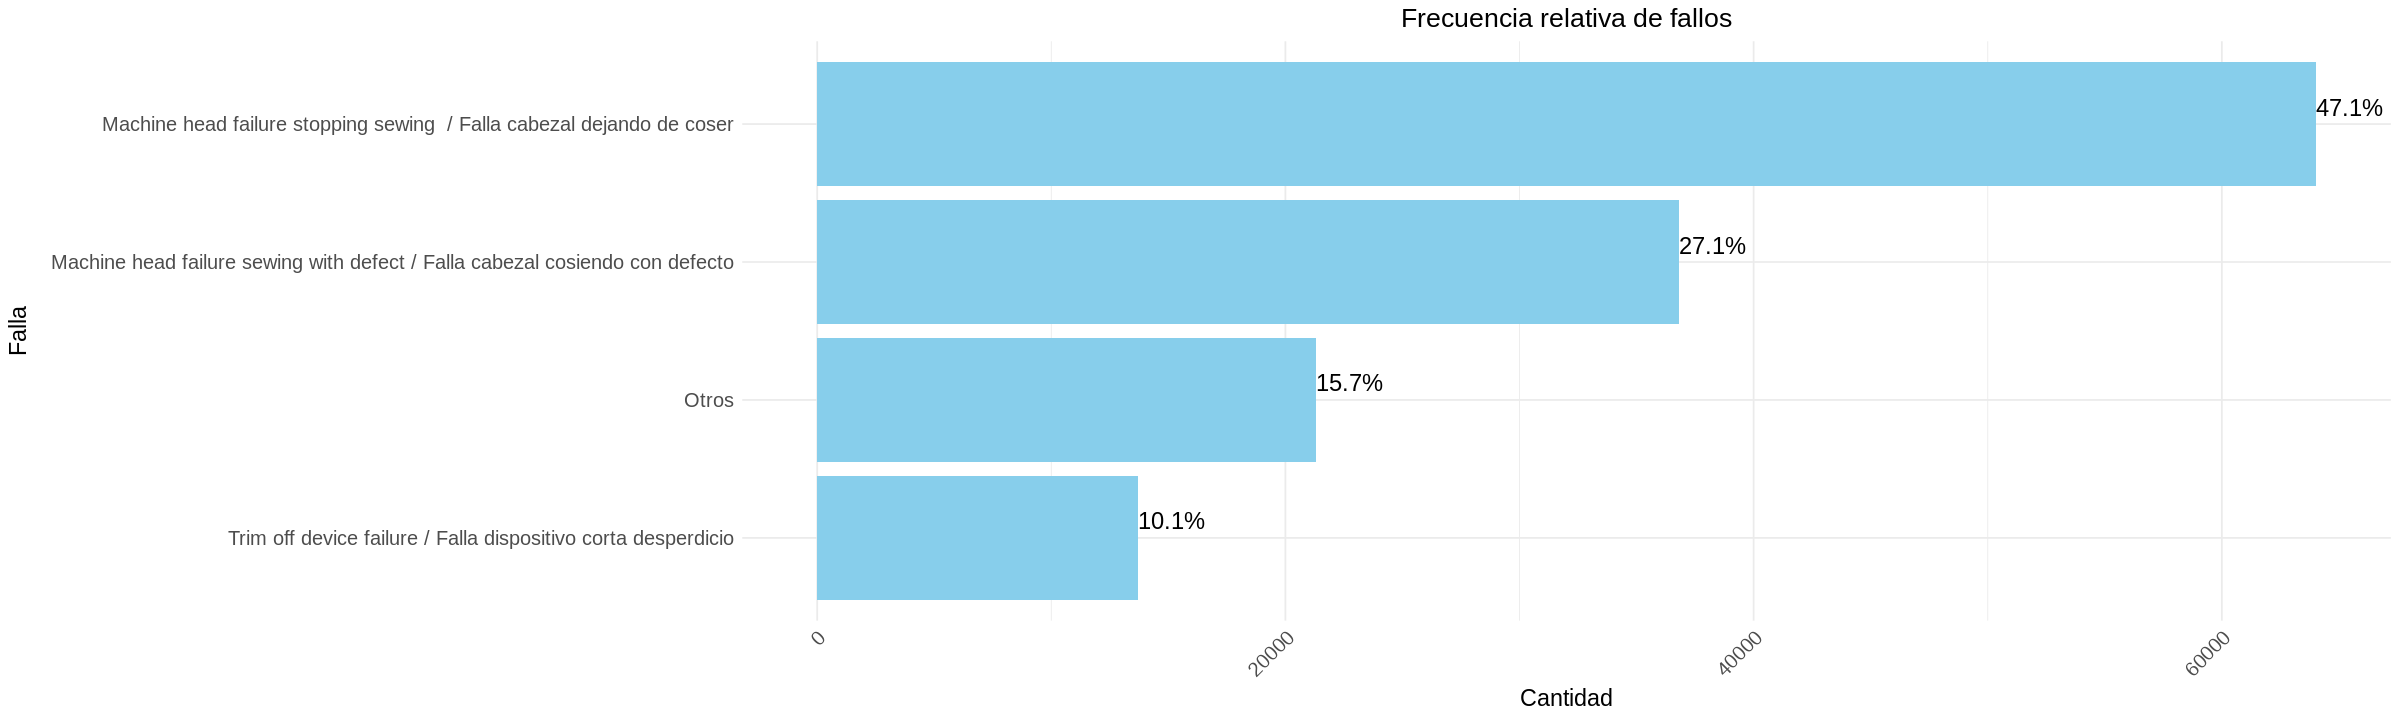

In [33]:
# Ordenar los datos por frecuencia descendente
failure_freq <- failure_freq %>%
  arrange(desc(count))

options(repr.plot.width=20, repr.plot.height=6)

ggplot(failure_freq, aes(y = reorder(failure_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0, size = 5) +  # Etiquetas de porcentaje acumulado
  labs(title = "Frecuencia relativa de fallos",
       y = "Falla",
       x = "Cantidad") +
  theme_minimal() +
   theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Cambia el tamaño del texto del eje x
    axis.text.y = element_text(size = 12),                         # Cambia el tamaño del texto del eje y
    axis.title.x = element_text(size = 14),                        # Cambia el tamaño del título del eje x
    axis.title.y = element_text(size = 14),                        # Cambia el tamaño del título del eje y
    plot.title = element_text(size = 16, hjust = 0.5)              # Cambia el tamaño del título del gráfico y lo centra
  )

**Variable "cause_desc"**

In [34]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
cause_freq <- cause_freq %>%
  mutate(relative_freq = count / sum(count))

cause_freq

cause_desc,count,relative_freq
<chr>,<int>,<dbl>
Misadjusted machine head looper / Enlazador de cabezal desajustado,51007,0.375443478
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,12994,0.095643981
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,11344,0.083498947
Broken machine head ball joint / Rotura de biela de cabezal,8785,0.064663104
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,6193,0.045584360
Misadjusted machine head teeth / Dientes de cabezal desajustados,5733,0.042198472
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,5387,0.039651695
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,4551,0.033498211
Oil leak in machine head / Fuga de aceite lubricante en cabezal,3194,0.023509841


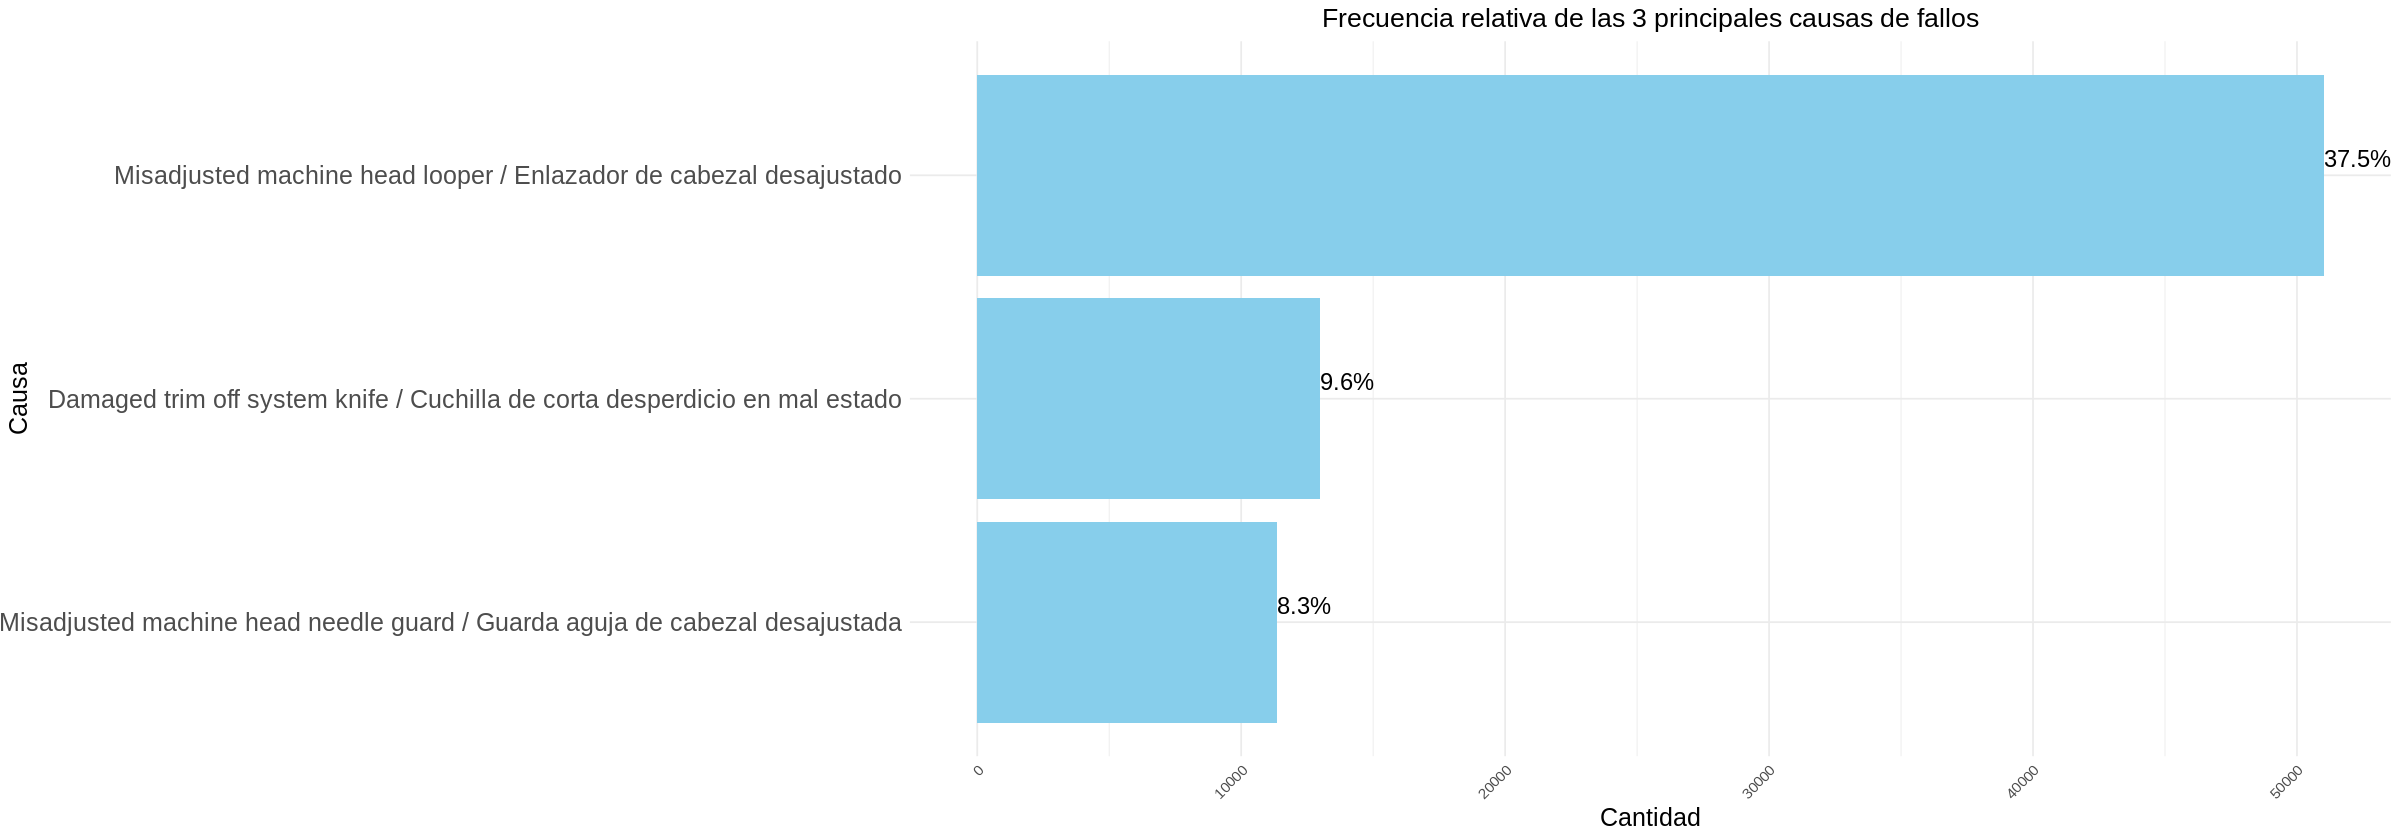

In [35]:
# Ordenar los datos por frecuencia descendente
cause_freq <- cause_freq %>%
  arrange(desc(count))

# Filtrar para obtener solo el top 3
top3_cause_freq <- cause_freq %>%
  slice_head(n = 3)

options(repr.plot.width=20, repr.plot.height=7)

ggplot(top3_cause_freq, aes(y = reorder(cause_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0,  size = 5) +  # Etiquetas de porcentaje acumulado
  labs(title = "Frecuencia relativa de las 3 principales causas de fallos",
       y = "Causa",
       x = "Cantidad") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 15),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    plot.title = element_text(size = 16, hjust = 0.5)
  )

**Variable "action_desc"**

In [36]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
action_freq <- action_freq %>%
  mutate(relative_freq = count / sum(count))

action_freq

action_desc,count,relative_freq
<chr>,<int>,<dbl>
Adjust machine head looper / Ajustar enlazador de cabezal,44919,0.330631983
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,11409,0.083977388
Adjust machine head teeth / Ajustar dientes de cabezal,9699,0.071390717
Sharpen knife / Afilar cuchillas,9087,0.066886013
Replace machine head ball joint / Reemplazar biela de cabezal,8825,0.064957529
Replace machine head looper / Reemplazar enlazador de cabezal,7719,0.056816676
Adjusted machine head presser foot / Ajustar prensatela de cabezal,6842,0.050361407
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,6205,0.045672688
Adjust machine head knife / Ajustar cuchilla de cabezal,4188,0.030826304


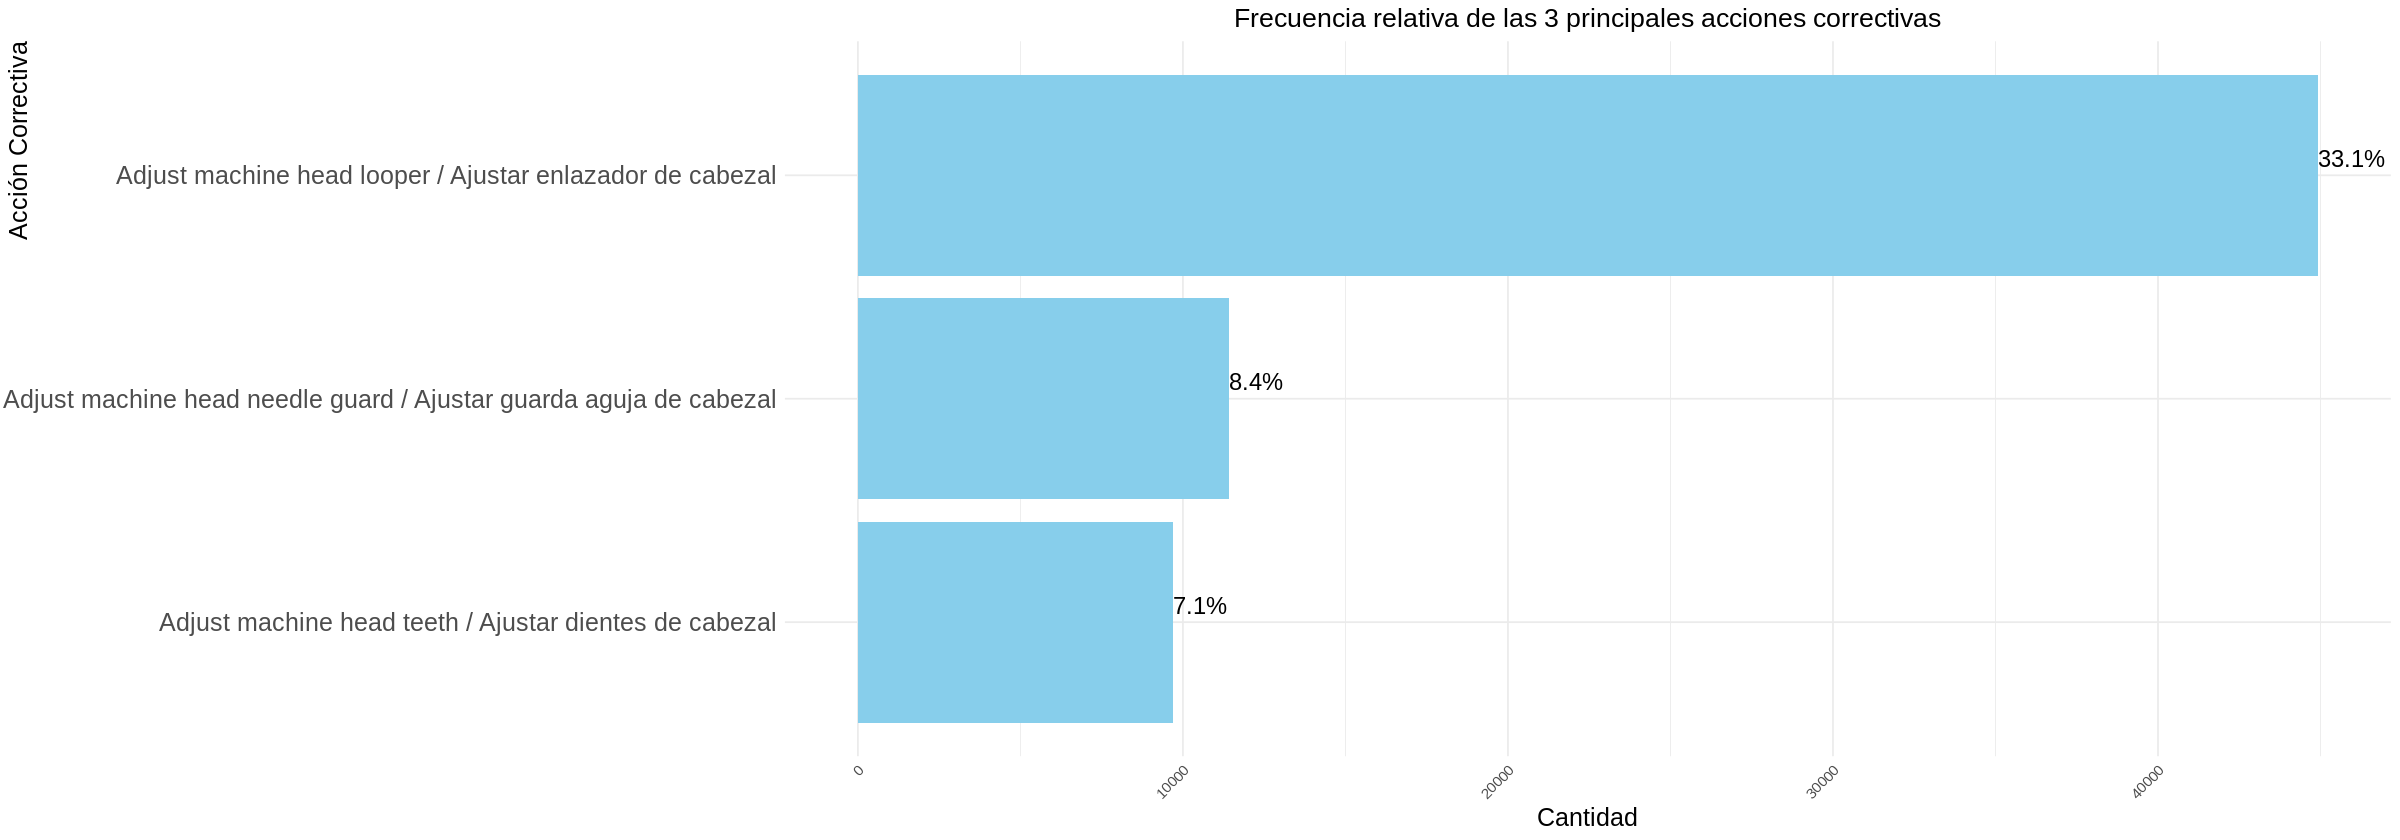

In [37]:
# Ordenar los datos por frecuencia descendente
action_freq <- action_freq %>%
  arrange(desc(count))

# Filtrar para obtener solo el top 3
top3_action_freq <- action_freq %>%
  slice_head(n = 3)

options(repr.plot.width=20, repr.plot.height=7)

ggplot(top3_action_freq, aes(y = reorder(action_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")),
            vjust = -0.5, hjust = 0, size = 5) +  # Ajuste del tamaño del texto
  labs(title = "Frecuencia relativa de las 3 principales acciones correctivas",
       y = "Acción Correctiva",
       x = "Cantidad") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 15),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15, hjust = 1),
    plot.title = element_text(size = 16, hjust = 0.5)
  )

**Variable "mechanic"**

In [38]:
# Calcular la frecuencia de fallos resueltos por mecánicos
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
mechanic_freq <- mechanic_freq %>%
  mutate(relative_freq = count / sum(count))

mechanic_freq

mechanic,count,relative_freq
<chr>,<int>,<dbl>
Otros,26935,0.198258476
Antony Ulloa,3226,0.023745381
Jose Manuel Perez Zepeda,3034,0.022332141
Omar Maldonado,2768,0.020374214
Erick Garcia Lima,2533,0.018644467
Ronald Antonio Herrera,2434,0.017915765
Edwin Colindres,2389,0.017584537
DIEGO CUELLAR,2247,0.016539328
Carlos Alberto Alfaro Salamanca,2234,0.016443640


**Variable "parts cost"**

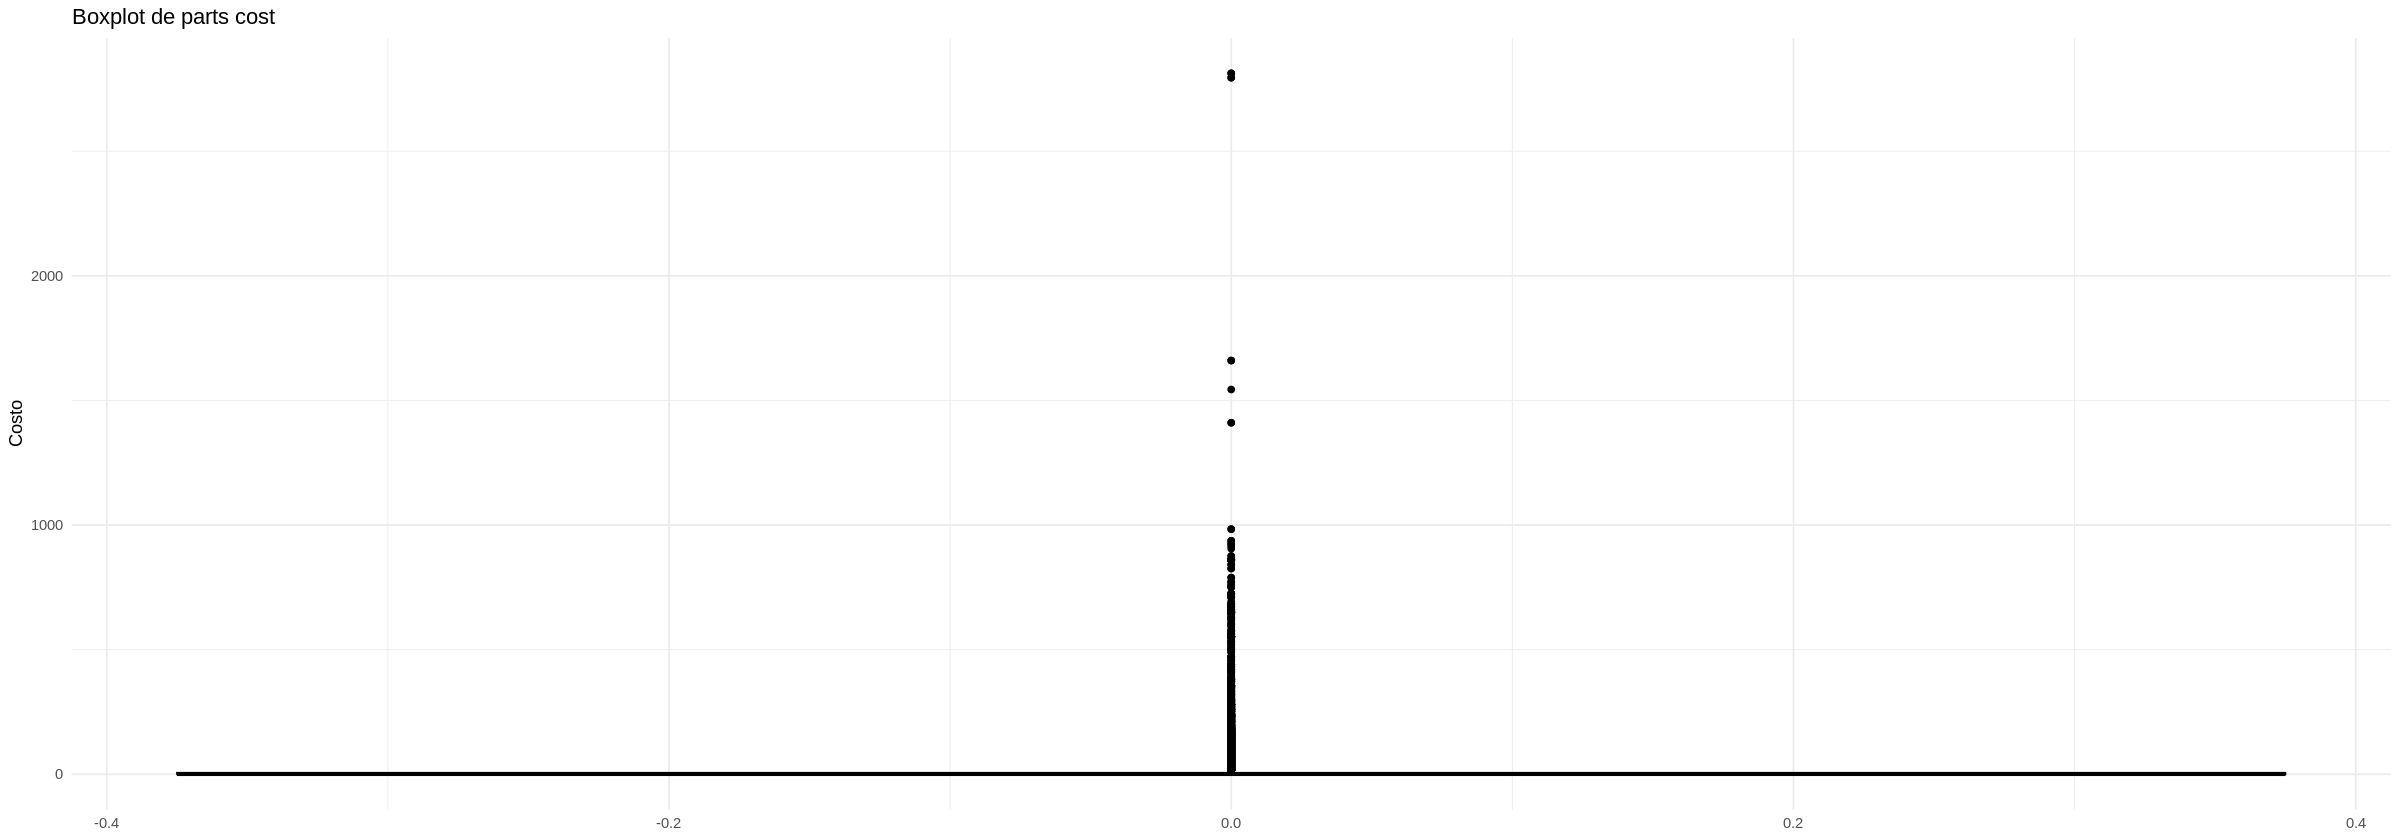

In [39]:
# Crear el boxplot de costo de partes
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo') +
  theme_minimal()

Warning message:
“Removed 9408 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


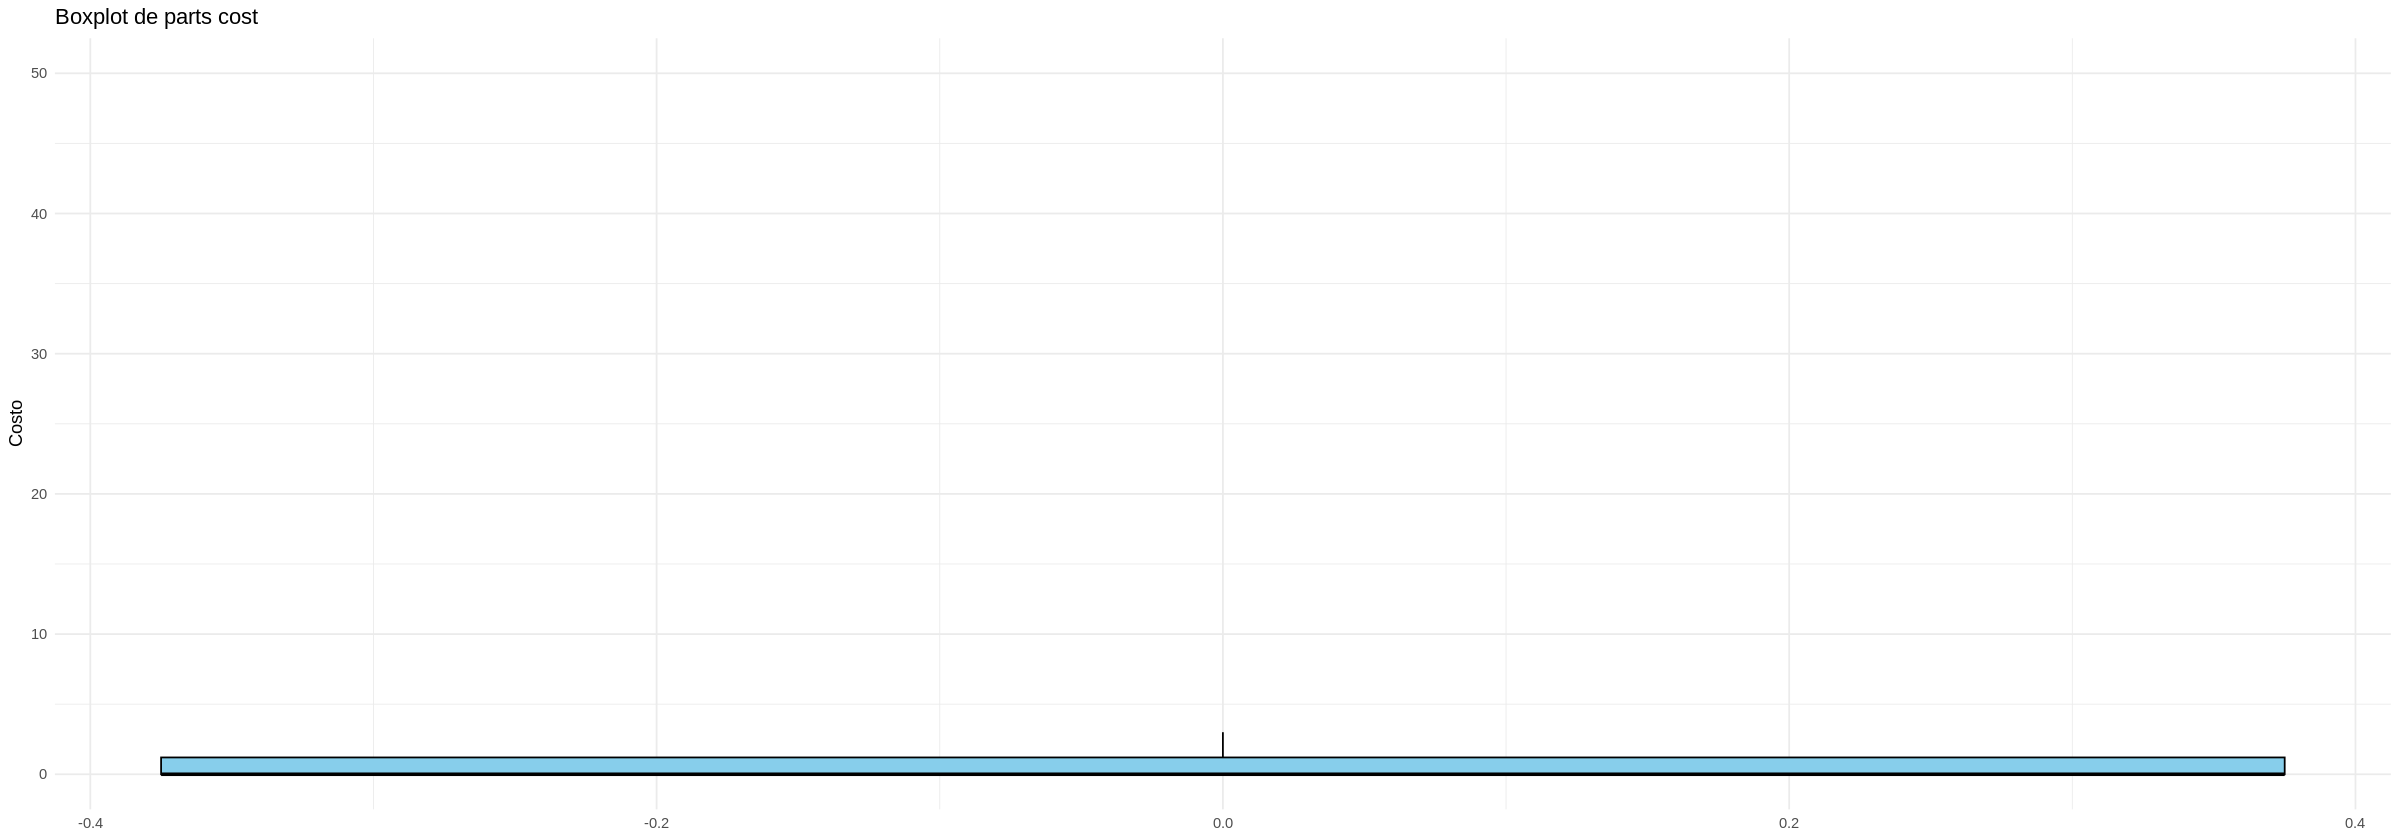

In [40]:
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA) +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo') +
  theme_minimal() +
  ylim(0, 50)

In [41]:
mean(df$parts_cost, na.rm = TRUE)      # Media
median(df$parts_cost, na.rm = TRUE)    # Mediana
sd(df$parts_cost, na.rm = TRUE)        # Desviación estándar
var(df$parts_cost, na.rm = TRUE)        # Varianza
range(df$parts_cost, na.rm = TRUE)      # Rango

[1] 12.11324

[1] 0

[1] 41.73935

[1] 1742.173

[1]    0.00 2812.49

**ANALISIS DE VARIABLE OBJETIVO "DOWNTIME GROSS"**

In [42]:
summary(df$downtime_gross)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.00   50.00   87.97  110.00  835.00 

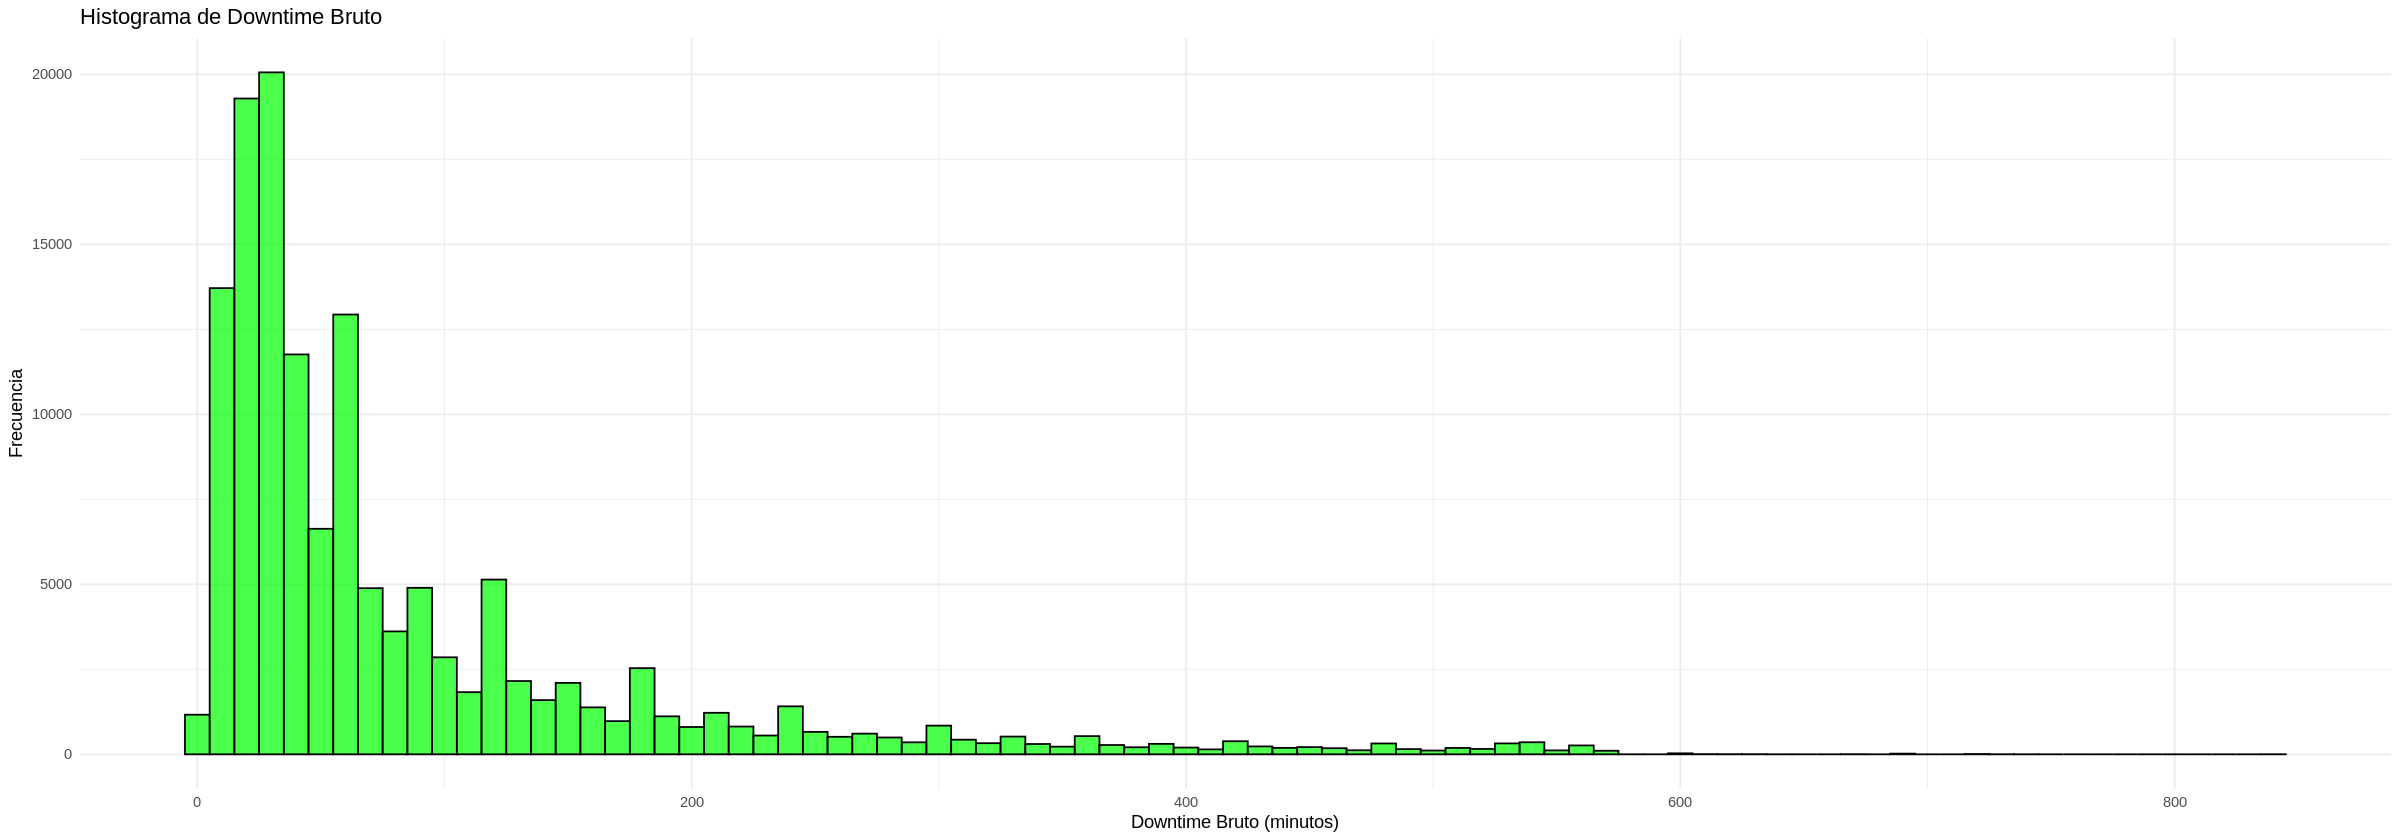

In [43]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 10, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (minutos)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

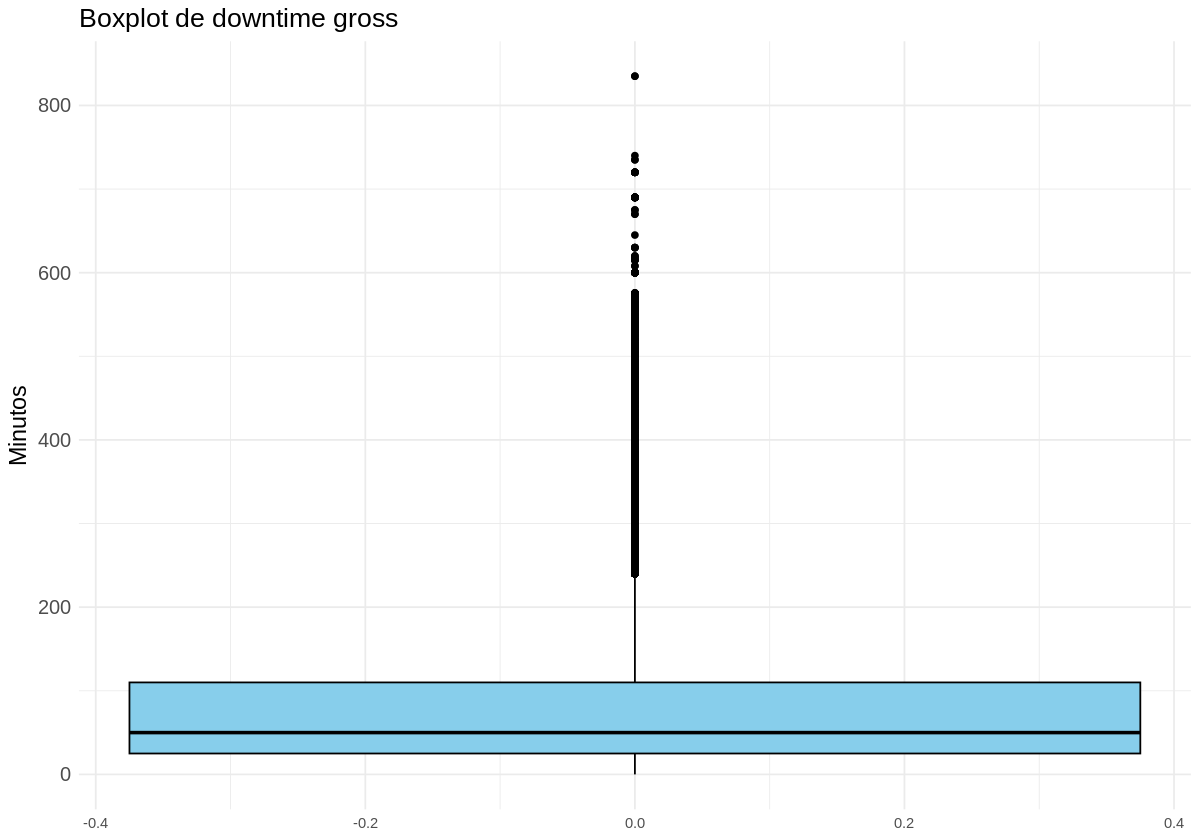

In [44]:
# Crear el boxplot de downtime gross
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12), # Tamaño del texto del eje y
    axis.title.y = element_text(size = 14), # Tamaño del título del eje y
    plot.title = element_text(size = 16)    # Tamaño del título del gráfico
  )

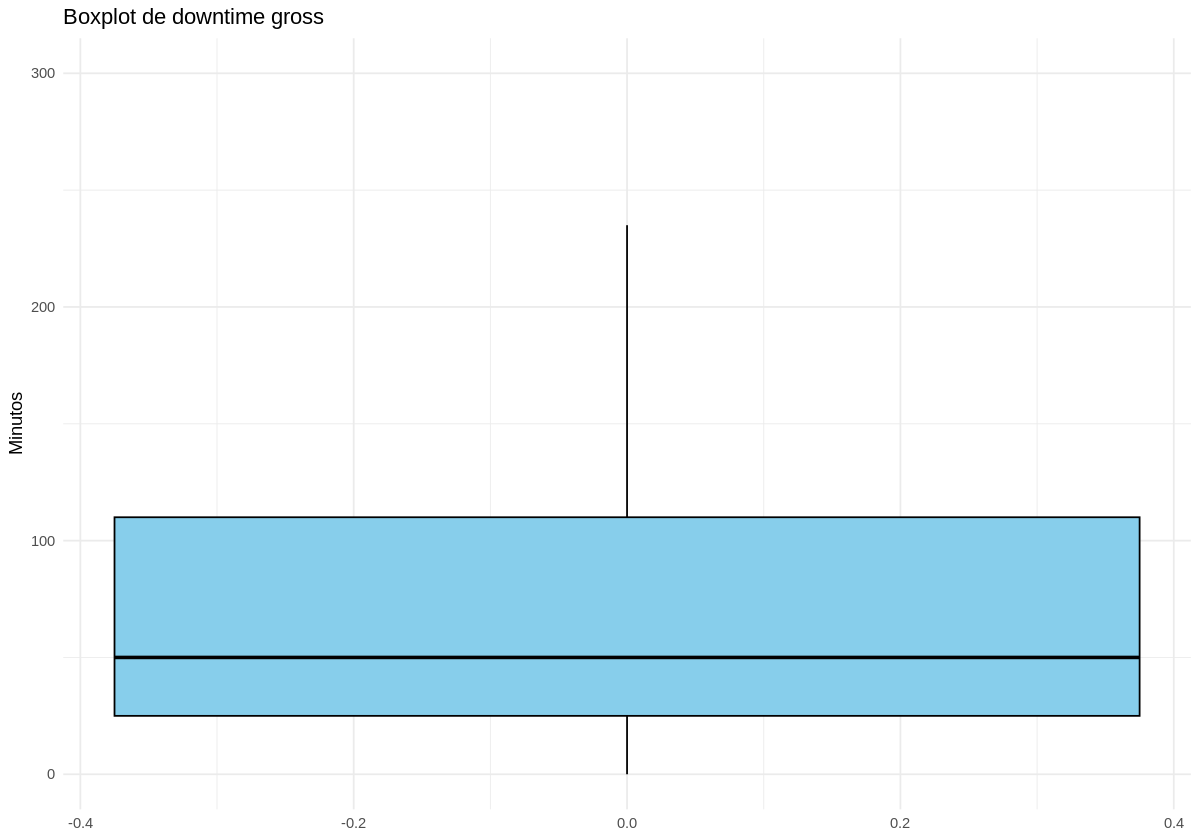

In [45]:
# Crear el boxplot de downtime gross
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA) +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal() + coord_cartesian(ylim = c(0, 300))

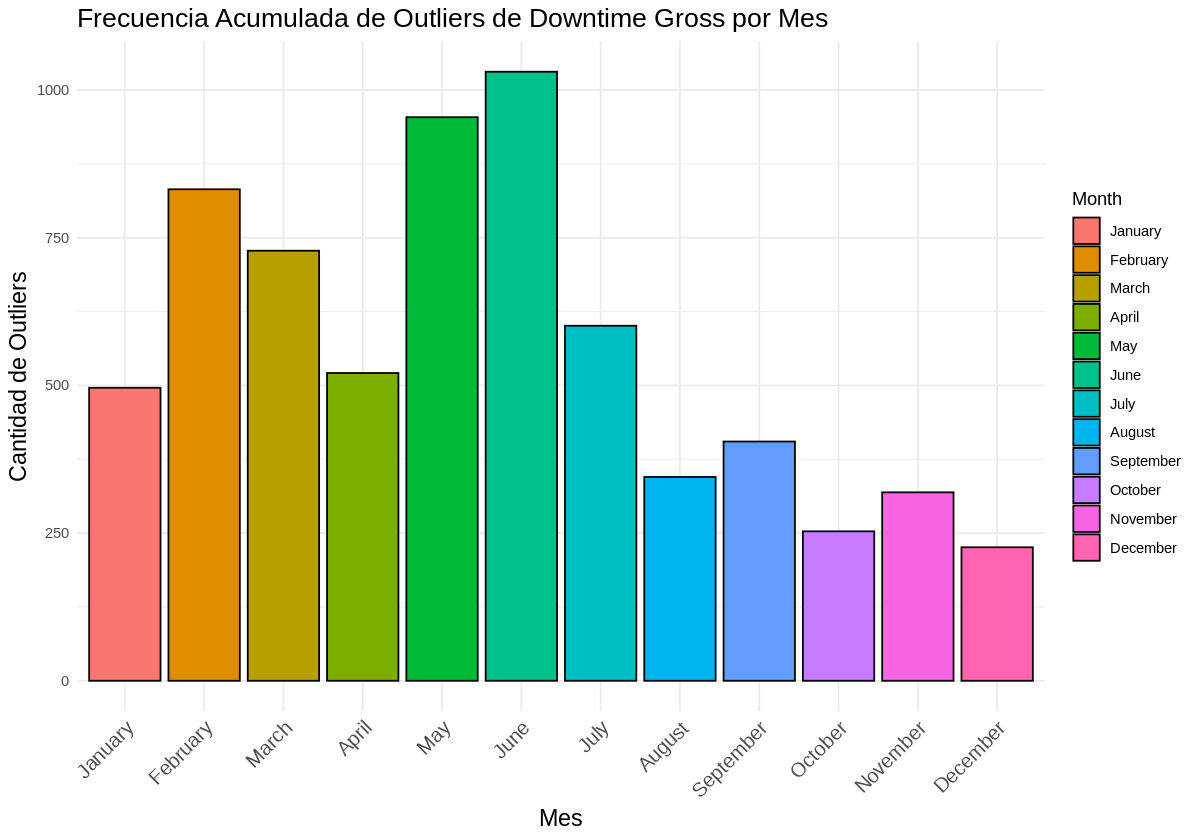

In [46]:
# Calcular el umbral de outliers (95% percentil)
outlier_threshold <- quantile(df$downtime_gross, 0.95)

# Identificar outliers
df$outlier <- ifelse(df$downtime_gross > outlier_threshold, TRUE, FALSE)

# Convertir la columna 'Date' a formato de fecha
df$date <- as.Date(df$date)

# Extraer solo el mes (sin el año) de la fecha
df <- df %>%
  mutate(Month = format(date, "%B")) # Nombre del mes

# Agrupar por mes y calcular la frecuencia acumulada de outliers
df_outliers <- df %>%
  group_by(Month) %>%
  summarise(Outliers = sum(outlier), .groups = 'drop') %>%
  arrange(match(Month, month.name)) # Ordenar por el orden de los meses

# Convertir la columna 'Month' a factor con el orden correcto
df_outliers$Month <- factor(df_outliers$Month, levels = month.name)

# Crear un gráfico de barras de la frecuencia acumulada de outliers por mes
ggplot(df_outliers, aes(x = Month, y = Outliers, fill = Month)) +
  geom_bar(stat = "identity", color = 'black') +
  labs(title = 'Frecuencia Acumulada de Outliers de Downtime Gross por Mes',
       x = 'Mes',
       y = 'Cantidad de Outliers') +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Tamaño y ángulo del texto del eje x
    axis.title.x = element_text(size = 14),                      # Tamaño del título del eje x
    axis.title.y = element_text(size = 14),                      # Tamaño del título del eje y
    plot.title = element_text(size = 16)                         # Tamaño del título del gráfico
  )

In [47]:
library(dplyr)

# Calcular el tiempo total improductivo por operación
total_downtime_by_operation <- df %>%
  group_by(operation) %>%
  summarise(total_downtime = sum(downtime_gross, na.rm = TRUE))
# Calcular el tiempo total improductivo general
total_downtime_all_operations <- sum(total_downtime_by_operation$total_downtime)
# Calcular la proporción del tiempo improductivo para cada operación
total_downtime_by_operation <- total_downtime_by_operation %>%
  mutate(proportion = total_downtime / total_downtime_all_operations)
# Filtrar el top 3 operaciones con mayor proporción de tiempo improductivo
top_3_operations <- total_downtime_by_operation %>%
  arrange(desc(proportion)) %>%
  head(3)

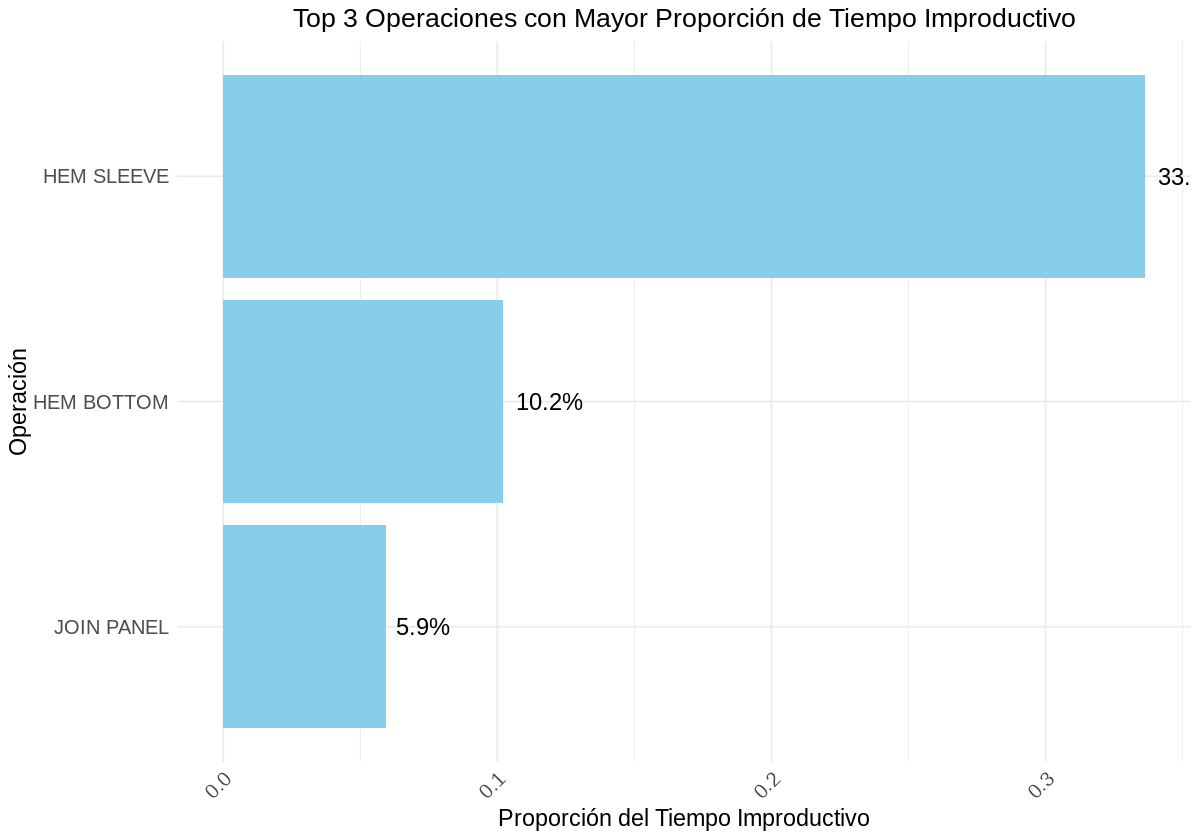

In [48]:
library(ggplot2)

# Crear gráfico de barras para el top 3 operaciones con mayor proporción de tiempo improductivo
ggplot(top_3_operations, aes(y = reorder(operation, proportion), x = proportion)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = scales::percent(proportion)), hjust = -0.2, size = 5) +
  labs(title = "Top 3 Operaciones con Mayor Proporción de Tiempo Improductivo",
       y = "Operación",
       x = "Proporción del Tiempo Improductivo") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 16, hjust = 0.5))

**GLM INICIAL PARA PREDECIR DOWNTIME**



In [49]:
df <- select(df, -wo_type, -outlier, -Month)
#Comparar con un glm

In [50]:
head(df,5)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,changed_pcs,Days_Between_Failures
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,Otros,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.00,0,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,1,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,1,0
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,Otros,2023-01-03,30,60.69,1,2
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,Otros,2023-01-03,30,60.69,1,0


In [51]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data1 <- df[trainIndex, ]
validation_data1 <- df[validationIndex, ]
test_data1 <- df[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data1), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data1), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data1), "\n")

Dimensiones del conjunto de entrenamiento:  95100 13 
Dimensiones del conjunto de validación:  27171 13 
Dimensiones del conjunto de prueba:  13587 13 


In [52]:
# Inicializar y ajustar el modelo de regresión lineal
#Dividir en entrenamiento, test, validación por ejemplo 70,20,10
start_time <- Sys.time()
model1 <- glm(downtime_gross~. -equipment -downtime_gross -Days_Between_Failures -date -changed_pcs, data = train_data1)
end_time <- Sys.time()
training_time1 <- end_time - start_time
training_time1
# Resumen del modelo
summary(model1)

Time difference of 9.410456 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    Days_Between_Failures - date - changed_pcs, data = train_data1)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 71.032373
operationBARTACK                                                                           -12.764902
operationBIND ARM                                                                          -22.690663
operationBIND LEG                                                                           -8.487509
operationBIND NECK                                                                         -24.450727
operationCLOSE SLEEVE                                                                        6.499479
operationFLAT LOCK                                                                         -10.763976
operationFLAT SEAM           

In [53]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model1, newdata = validation_data1)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data1$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  93.22261 
Validation MAE:  61.40889 
Validation R-squared:  0.1480097 


In [54]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model1, newdata = test_data1)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data1$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  92.9449 
Test MAE:  61.42112 
Test R-squared:  0.1623169 


**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [55]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [56]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

In [57]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data2 <- df[trainIndex, ]
validation_data2 <- df[validationIndex, ]
test_data2 <- df[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data2), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data2), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data2), "\n")

Dimensiones del conjunto de entrenamiento:  95100 15 
Dimensiones del conjunto de validación:  27171 15 
Dimensiones del conjunto de prueba:  13587 15 


**GLM PARA PREDECIR DOWNTIME CON MAS VARIABLES**

In [58]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model2 <- glm(downtime_gross~. -equipment -downtime_gross -date -changed_pcs, data = train_data2)
end_time <- Sys.time()
training_time2 <- end_time - start_time
training_time2
# Resumen del modelo
summary(model2)

Time difference of 8.213939 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - changed_pcs, data = train_data2)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 7.421e+01
operationBARTACK                                                                           -1.246e+01
operationBIND ARM                                                                          -2.291e+01
operationBIND LEG                                                                          -8.433e+00
operationBIND NECK                                                                         -2.439e+01
operationCLOSE SLEEVE                                                                       6.549e+00
operationFLAT LOCK                                                                         -1.056e+01
operationFLAT SEAM                                   

In [59]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model2, newdata = validation_data2)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data2$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  93.13536 
Validation MAE:  61.39739 
Validation R-squared:  0.1496036 


In [60]:
# Predecir con el conjunto de prueba (ya calculado, pero repitiendo para claridad)
test_predictions <- predict(model2, newdata = test_data2)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data2$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  92.88477 
Test MAE:  61.39467 
Test R-squared:  0.1634004 


**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [61]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [62]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [63]:
head(df_merged,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,changed_pcs,Days_Between_Failures,Cumulative_Failure_Count,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,Otros,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.0,0,2,1,51.0,26
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,1,2,1,19.2,23
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,1,0,2,38.4,23


In [64]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df_merged)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data3 <- df_merged[trainIndex, ]
validation_data3 <- df_merged[validationIndex, ]
test_data3 <- df_merged[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data3), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data3), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data3), "\n")

Dimensiones del conjunto de entrenamiento:  95100 16 
Dimensiones del conjunto de validación:  27171 16 
Dimensiones del conjunto de prueba:  13587 16 


In [65]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model3 <- glm(downtime_gross~. -equipment -downtime_gross -date -changed_pcs, data = train_data3)
end_time <- Sys.time()
training_time3 <- end_time - start_time
training_time3
# Resumen del modelo
summary(model3)

Time difference of 8.739759 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - changed_pcs, data = train_data3)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 62.244773
operationBARTACK                                                                           -10.338766
operationBIND ARM                                                                          -22.223259
operationBIND LEG                                                                           -7.172049
operationBIND NECK                                                                         -23.202273
operationCLOSE SLEEVE                                                                        8.140849
operationFLAT LOCK                                                                          -8.389354
operationFLAT SEAM                                   

In [66]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model3, newdata = validation_data3)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data3$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  93.07222 
Validation MAE:  61.35166 
Validation R-squared:  0.1507563 


In [67]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model3, newdata = test_data3)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data3$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  92.81877 
Test MAE:  61.36279 
Test R-squared:  0.164589 


**MODELO AGREGANDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [68]:
# Primero, calcula la media de antiquity
mean_antiquity <- mean(df_mechanic$antiquity, na.rm = TRUE)

# Realiza el left join y luego reemplaza los NA en antiquity con la media calculada
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic") %>%
  mutate(antiquity = ifelse(is.na(antiquity), mean_antiquity, antiquity))

In [69]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df_merged2)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data4 <- df_merged2[trainIndex, ]
validation_data4 <- df_merged2[validationIndex, ]
test_data4 <- df_merged2[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data4), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data4), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data4), "\n")

Dimensiones del conjunto de entrenamiento:  95100 17 
Dimensiones del conjunto de validación:  27171 17 
Dimensiones del conjunto de prueba:  13587 17 


In [70]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model4 <- glm(downtime_gross~. -equipment -downtime_gross -date -changed_pcs, data = train_data4)
end_time <- Sys.time()
training_time4 <- end_time - start_time
training_time4
# Resumen del modelo
summary(model4)

Time difference of 7.885493 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - changed_pcs, data = train_data4)

Coefficients: (1 not defined because of singularities)
                                                                                             Estimate
(Intercept)                                                                                 62.244773
operationBARTACK                                                                           -10.338766
operationBIND ARM                                                                          -22.223259
operationBIND LEG                                                                           -7.172049
operationBIND NECK                                                                         -23.202273
operationCLOSE SLEEVE                                                                        8.140849
operationFLAT LOCK                                                                          -8.389354
operationFLA

In [71]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model4, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  93.07222 
Validation MAE:  61.35166 
Validation R-squared:  0.1507563 


In [72]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model4, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  92.81877 
Test MAE:  61.36279 
Test R-squared:  0.164589 


**AGREGANDO LA VARIABLE "CHANGED_PCS"**

In [73]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model5 <- glm(downtime_gross~. -equipment -downtime_gross -date -antiquity, data = train_data4)
end_time <- Sys.time()
training_time5 <- end_time - start_time
training_time5
# Resumen del modelo
summary(model5)

Time difference of 8.89631 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - antiquity, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 49.960982
operationBARTACK                                                                           -15.166471
operationBIND ARM                                                                          -17.402190
operationBIND LEG                                                                          -11.298982
operationBIND NECK                                                                         -18.578755
operationCLOSE SLEEVE                                                                        2.928730
operationFLAT LOCK                                                                         -10.128266
operationFLAT SEAM                                     

In [74]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model5, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  66.74516 
Validation MAE:  39.74486 
Validation R-squared:  0.5632512 


In [75]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model5, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.48923 
Test MAE:  39.69079 
Test R-squared:  0.5713219 


**IMPLEMENTACION DE FRONTWARD**

In [76]:
sapply(df_merged2, function(x) sum(is.na(x)))

equipment                   operation 
                          0                           0 
                 base_model                problem_desc 
                          0                           0 
               failure_desc                  cause_desc 
                          0                           0 
                action_desc                    mechanic 
                          0                           0 
                       date              downtime_gross 
                          0                           0 
                 parts_cost                 changed_pcs 
                          0                           0 
      Days_Between_Failures    Cumulative_Failure_Count 
                          0                           0 
Cumulative_Maintenance_Cost                         Age 
                          0                           0 
                  antiquity 
                          0

In [77]:
# Realizar frontward elimination
model_null <- lm(downtime_gross ~ 1, data = train_data4)
model_forward <- step(model_null,
                      scope = list(lower = model_null, upper = model5),
                      direction = "forward")
model_forward$anova

Start:  AIC=879713.1
downtime_gross ~ 1

                              Df Sum of Sq       RSS    AIC
+ changed_pcs                  1 500060218 489789987 812805
+ mechanic                    85 132541098 857309106 866212
+ operation                   24  37878912 951971293 876050
+ base_model                  21  31230275 958619930 876706
+ action_desc                 28  27301122 962549082 877109
+ cause_desc                  28  25936370 963913834 877244
+ problem_desc                 2  23905344 965944861 877392
+ parts_cost                   1   9364447 980485758 878811
+ failure_desc                 3   7565519 982284685 878989
+ Age                          1   5831346 984018859 879153
+ Days_Between_Failures        1   3883037 985967168 879341
+ Cumulative_Maintenance_Cost  1   3396562 986453643 879388
+ Cumulative_Failure_Count     1   1080976 988769228 879611
<none>                                     989850205 879713

Step:  AIC=812805
downtime_gross ~ changed_pcs

          

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,95099,989850205,879713.1
+ changed_pcs,-1,500060217.90,95098,489789987,812805.0
+ mechanic,-85,55991828.28,95013,433798158,801430.1
+ operation,-24,3676760.47,94989,430121398,800668.6
+ cause_desc,-28,1086040.06,94961,429035358,800484.2
+ problem_desc,-2,707543.63,94959,428327814,800331.2
+ Age,-1,396302.71,94958,427931512,800245.2
+ base_model,-21,542075.50,94937,427389436,800166.6
+ action_desc,-28,582600.09,94909,426806836,800092.9


In [78]:
formula = as.formula("downtime_gross ~ changed_pcs + mechanic + operation +
    cause_desc + Cumulative_Maintenance_Cost + base_model + Days_Between_Failures +
    failure_desc + problem_desc + action_desc + Age + Cumulative_Failure_Count")

In [79]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model6 <- glm(formula = formula, data = train_data4)
end_time <- Sys.time()
training_time6 <- end_time - start_time
training_time6
# Resumen del modelo
summary(model6)

Time difference of 7.921221 secs


Call:
glm(formula = formula, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 4.991e+01
changed_pcs                                                                                 5.495e+01
mechanicAdalberto Jeremias Rodriguez Zometa                                                -2.593e+01
mechanicAlfonso Escobar                                                                    -3.549e+01
mechanicAnthony Murillo                                                                    -2.301e+01
mechanicAntony Ulloa                                                                       -2.025e+01
mechanicCain Alfredo Ramirez                                                               -1.422e+00
mechanicCarlos Alberto Alfaro Salamanca                                                     2.655e+01
mechanicCARLOS CA

In [80]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model6, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.48391 
Test MAE:  39.68947 
Test R-squared:  0.5713905 


In [81]:
# Extraer los residuos del modelo
residuos <- residuals(model6)

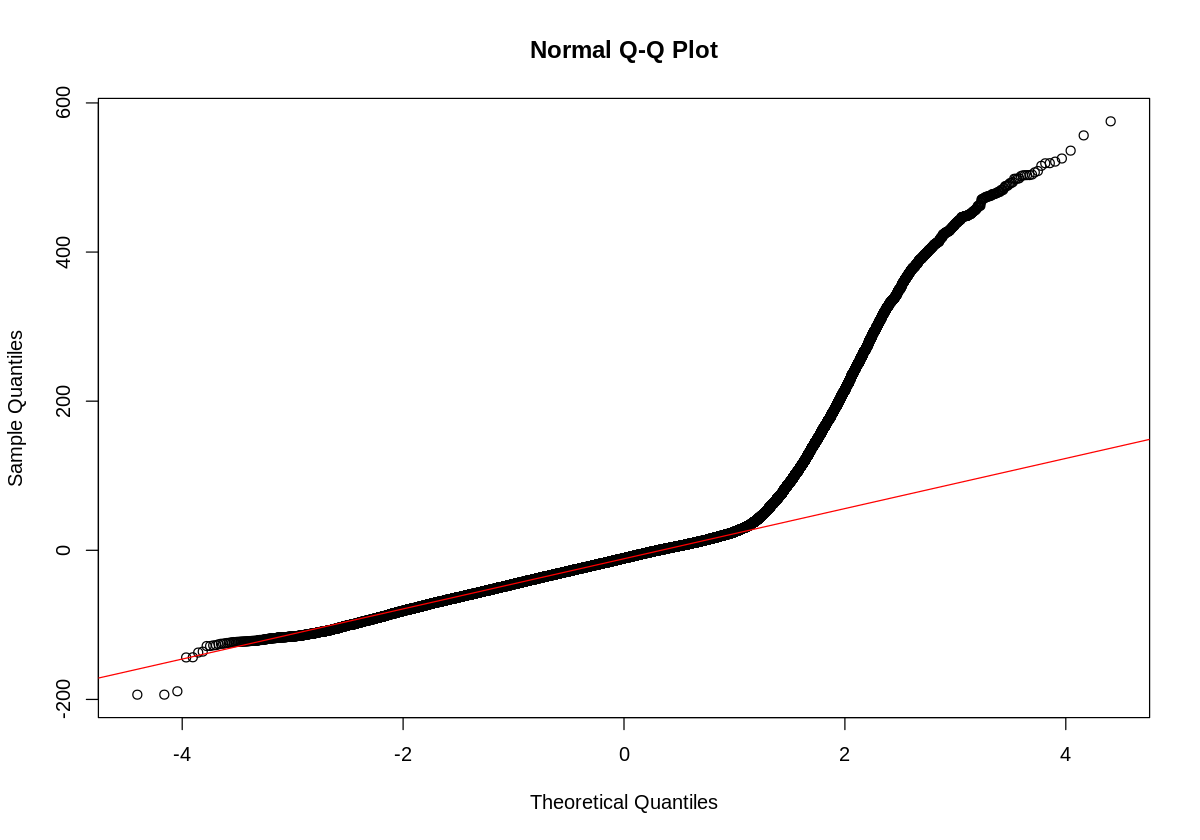

In [82]:
# Gráfico Q-Q de los residuos
qqnorm(residuos)
qqline(residuos, col = "red")

**MODELO RANDOM FOREST**

In [83]:
# Entrenar el modelo de Random Forest
start_time <- Sys.time()
model_rf <- randomForest(downtime_gross~. -equipment -downtime_gross -date -antiquity, data = train_data4, importance = TRUE)
end_time <- Sys.time()
training_time7 <- end_time - start_time
training_time7
# Ver el resumen del modelo
print(model_rf)

Time difference of 1.57643 hours


Call:
 randomForest(formula = downtime_gross ~ . - equipment - downtime_gross -      date - antiquity, data = train_data4, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 3455.089
                    % Var explained: 66.81


In [84]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model_rf, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  58.46836 
Validation MAE:  33.87617 
Validation R-squared:  0.6648541 


In [85]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model_rf, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  58.69398 
Test MAE:  34.05731 
Test R-squared:  0.6659467 


,%IncMSE,IncNodePurity
operation,80.42871,33460175
base_model,81.42692,30666983
problem_desc,103.63879,20795394
failure_desc,76.85580,15737824
cause_desc,82.82541,29476480
action_desc,99.44326,29634880
mechanic,133.23341,54062463
parts_cost,51.79888,31785463
changed_pcs,525.21611,471318646
Days_Between_Failures,11.80494,33156880


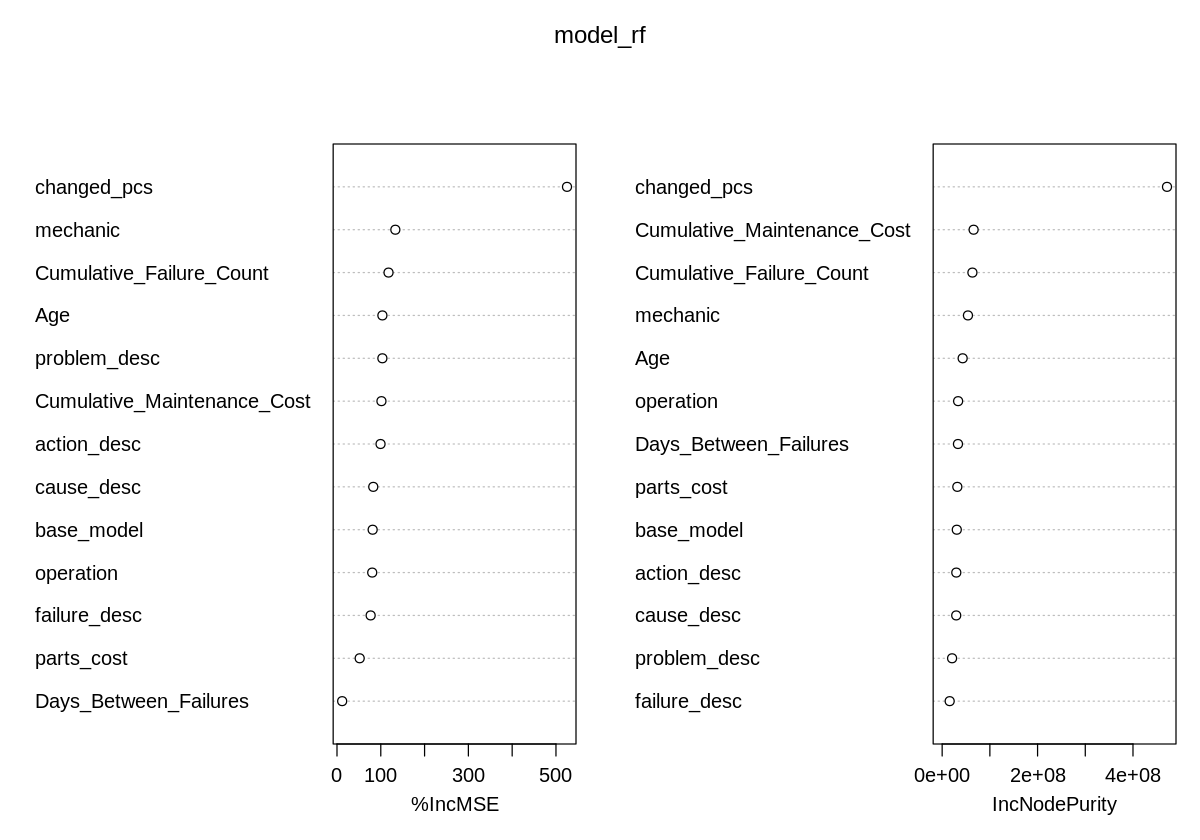

In [88]:
# Ver la importancia de las variables
importance(model_rf)
varImpPlot(model_rf)